### 네이버 얼굴 인식(CFR)

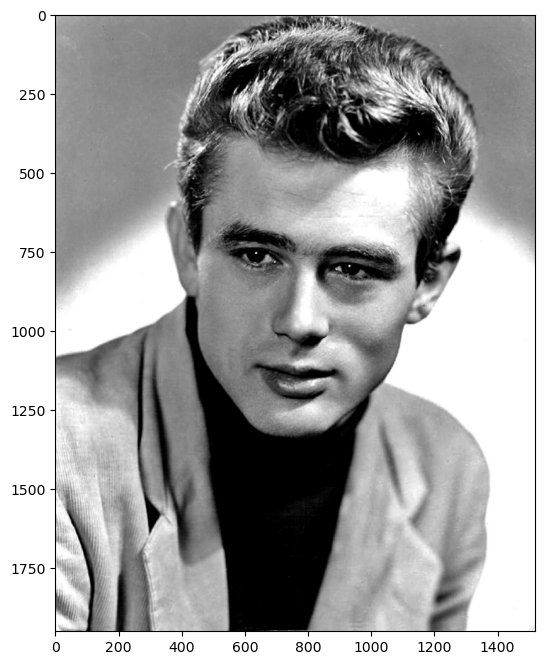

{"info":{"size":{"width":1518,"height":1950},"faceCount":1},"faces":[{"celebrity":{"value":"정우성","confidence":0.23973}}]}


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(10, 8)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print(response.text)
else:
    print("Error Code:" + rescode)

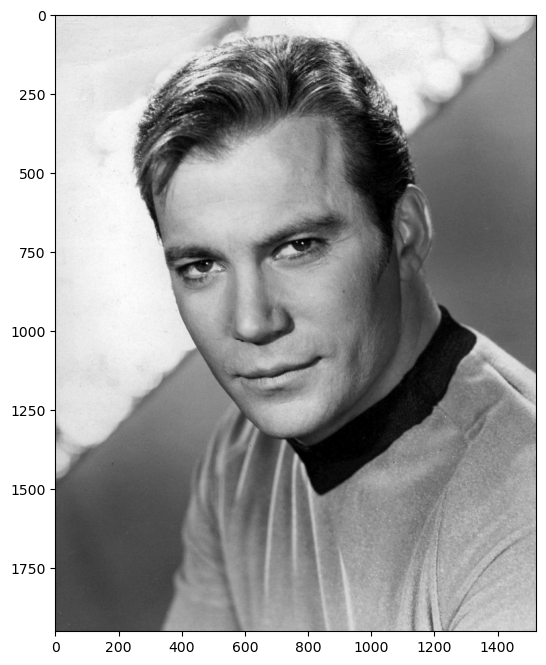

{
    "info": {
        "size": {
            "width": 1522,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "그랜트거스틴",
                "confidence": 0.513635
            }
        }
    ]
}
<class 'str'>
{'info': {'size': {'width': 1522, 'height': 1950}, 'faceCount': 1}, 'faces': [{'celebrity': {'value': '그랜트거스틴', 'confidence': 0.513635}}]}


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests
import json

img = mpimg.imread("./datas/face_detection2.jpg")
plt.figure(figsize=(10, 8)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('./datas/face_detection2.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
parsed = json.loads(response.text)

# 딕셔너리를 json.dumps 처리하면 json데이터로 저장함
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))
print(type(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)))

# print(response.text)
# print(type(response.text))

if(rescode==200):
    print(parsed)
    # print(type(parsed)) # 파이썬 딕셔너리
else:
    print("Error Code:" + rescode)

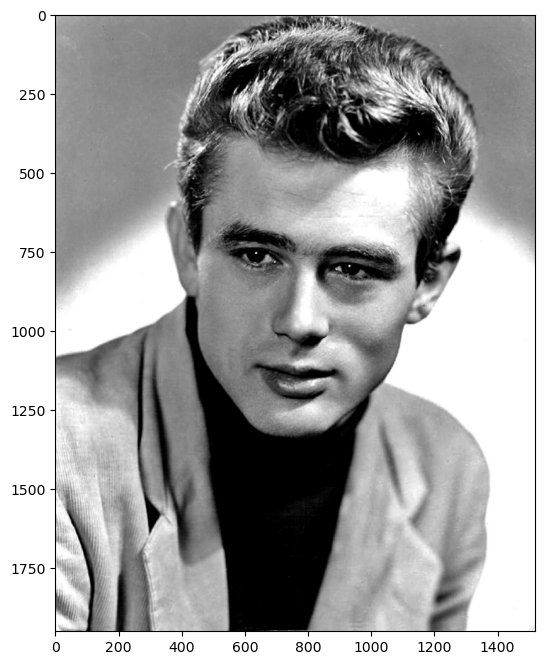

{'info': {'size': {'width': 1518, 'height': 1950}, 'faceCount': 1}, 'faces': [{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678}, 'landmark': {'leftEye': {'x': 634, 'y': 746}, 'rightEye': {'x': 952, 'y': 797}, 'nose': {'x': 760, 'y': 981}, 'leftMouth': {'x': 625, 'y': 1105}, 'rightMouth': {'x': 902, 'y': 1133}}, 'gender': {'value': 'male', 'confidence': 0.999999}, 'age': {'value': '26~30', 'confidence': 0.160886}, 'emotion': {'value': 'neutral', 'confidence': 0.999995}, 'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]}


In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests
import json

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(10, 8)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴인식
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
detect_result = json.loads(response.text)

if(rescode==200):
    print(detect_result)
else:
    print("Error Code:" + rescode)

In [31]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [32]:
detect_result['faces']

[{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
  'landmark': {'leftEye': {'x': 634, 'y': 746},
   'rightEye': {'x': 952, 'y': 797},
   'nose': {'x': 760, 'y': 981},
   'leftMouth': {'x': 625, 'y': 1105},
   'rightMouth': {'x': 902, 'y': 1133}},
  'gender': {'value': 'male', 'confidence': 0.999999},
  'age': {'value': '26~30', 'confidence': 0.160886},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]